In [1]:
%load_ext autoreload
%autoreload 2
from sectional_v2.constants import path_eusaar_data# path_eusaar_data
import numpy as np
from sectional_v2.util import eusaar_data
from sectional_v2.util.eusaar_data.histc_vars import load_var_as_dtframe
from sectional_v2.util.eusaar_data import  distc_var, histc_vars, histsc_hists # import load_var_as_dtframe
import matplotlib.pyplot as plt
from useful_scit.plot import get_cmap_dic

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/


## distc_var

In [2]:
a = distc_var.get_distc_xarray_all()

ValueError: the first argument to .rename must be a dictionary

In [3]:
sts = a['station'].values[:4]
year='BOTH'
subs='TOT'
cma = get_cmap_dic(sts)
da = a.sel(year=year,subset=subs)
for st in sts:
    _da50 = da.sel(station=st, percentile='50th percentile')#
    _da50.plot(yscale='log',xscale='log', label='50th perc, %s'%st, color = cma[st])
    _da95 = da.sel(station=st, percentile='95th percentile')
    _da5 = da.sel(station=st, percentile='5th percentile')
    plt.fill_between(da.diameter, _da5,_da95, alpha=.2 , color = cma[st])
plt.ylim(1,3e4)
plt.xlim(5,1e3)
plt.legend()
plt.title('Test sizedistributions')

NameError: name 'a' is not defined

### Conversion dN/dlog10D to dN/dlnD:
$$ ln(x) = ln(10)\cdot log10(x)$$
So
\begin{align}
\frac{dN}{dlog10D} =& \frac{dN}{dlnD}\frac{dlnD}{dlog10D} \\
=& \frac{dN}{dlnD}\frac{d(ln(10)\cdot log10(D)}{dlog10D} \\
=& \frac{dN}{dlnD}ln(10) \\
\end{align}
and 
$$\frac{dN}{dlnD} = 1/ln(10) \frac{dN}{dlog10D}$$

## histc_var

In [7]:
b = histc_vars.get_histc_vars_xr()
_da = b['N30']#.plot()
for st in sts:
    _da.sel(station=st).plot(label=st, yscale='log')
plt.ylim([1e0,1e4])
plt.legend()

NameError: name 'sts' is not defined

In [8]:
histc.load_gd()

NameError: name 'histc' is not defined

## histsc_hists

In [4]:
c = histsc_hists.open_hists2xarray()

In [5]:
c

<xarray.Dataset>
Dimensions:                 (number concentration: 121, station: 24)
Coordinates:
  * number concentration    (number concentration) float64 0.1 0.1122 ... 1e+05
  * station                 (station) object 'KPO' 'BEO' 'MHD' ... 'SMR' 'JFJ'
Data variables:
    N30-50 all time         (station, number concentration) float64 16.0 ... 0.0
    N50    all time         (station, number concentration) float64 1.0 ... 0.0
    N100   all time         (station, number concentration) float64 1.0 ... 0.0
    N30-50 Winter           (station, number concentration) float64 5.0 ... 0.0
    N30-50 Spring           (station, number concentration) float64 5.0 ... 0.0
    N30-50 Summer           (station, number concentration) float64 6.0 ... 0.0
    N30-50 Autumn           (station, number concentration) float64 0.0 ... 0.0
    N50 Winter              (station, number concentration) float64 0.0 ... 0.0
    N50 Spring              (station, number concentration) float64 0.0 ... 0.0
    N50 Summer              (station, number concentration) float64 1.0 ... 0.0
    N50 Autumn              (station, number concentration) float64 0.0 ... 0.0
    N100 Winter             (station, number concentration) float64 0.0 ... 0.0
    N100 Spring             (station, number concentration) float64 0.0 ... 0.0
    N100 Summer             (station, number concentration) float64 1.0 ... 0.0
    N100 Autumn             (station, number concentration) float64 0.0 ... 0.0
    N30-50 Night            (station, number concentration) float64 0.0 ... 0.0
    N30-50 Day              (station, number concentration) float64 16.0 ... 0.0
    N50 Night               (station, number concentration) float64 0.0 ... 0.0
    N50 Day                 (station, number concentration) float64 1.0 ... 0.0
    N100 Night              (station, number concentration) float64 0.0 ... 0.0
    N100 Day                (station, number concentration) float64 1.0 ... 0.0
    N30-50 ECHAM5 Sampling  (station, number concentration) float64 9.0 ... 0.0
    N50 ECHAM5 Sampling     (station, number concentration) float64 1.0 ... 0.0
    N100 ECHAM5 Sampling    (station, number concentration) float64 1.0 ... 0.0

In [6]:
_da = c['N30-50 Summer']#.plot()
for st in sts:
    _da.sel(station=st).plot(label=st, xscale='log')
plt.legend()

NameError: name 'sts' is not defined

In [ ]:
mn =  a['N50'].resample({'time':'1M'}).mean()
for station in mn.station:
    mn.sel(station=station).plot(label=station.values)
plt.legend()

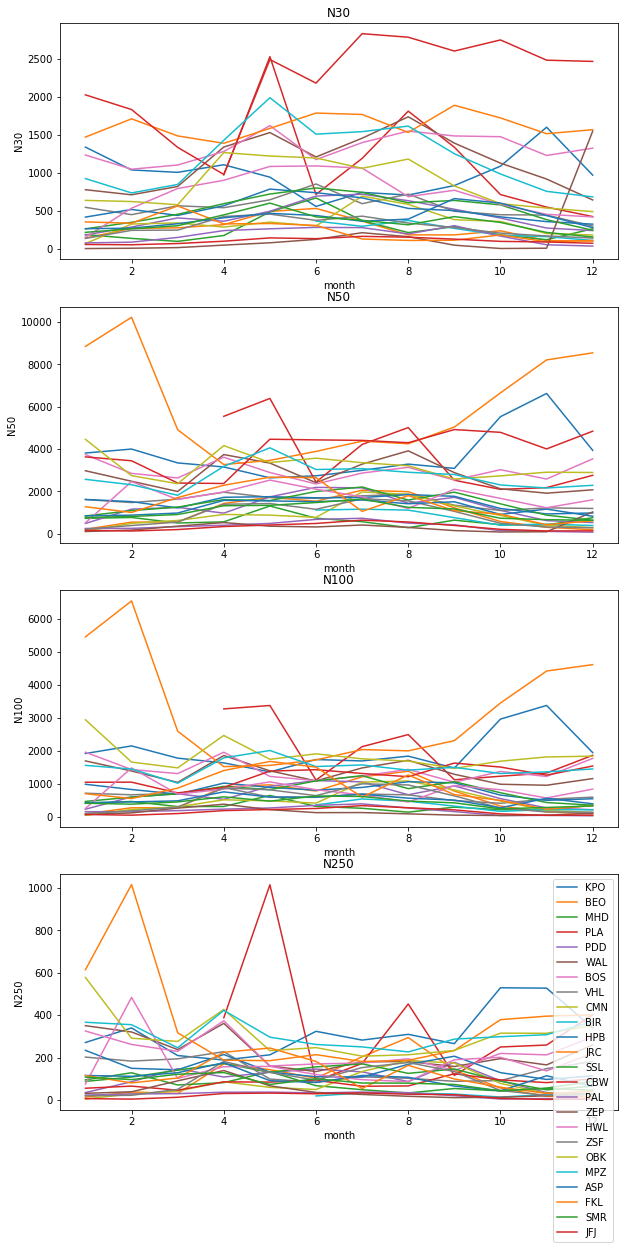

In [48]:
varl = eusaar_data.standard_varlist_histc
fig, axs = plt.subplots(len(varl), 
                        figsize=[10,20])
for var, ax in zip(varl, axs):
    mn =  a[var].groupby('time.month').mean()
    for station in mn.station:
        mn.sel(station=station).plot(label=station.values, ax=ax)
    ax.set_title(var)
ax.legend()